In [ ]:
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:80% !important; }</style>")) 
import numpy as np 

## Czym jest baza danych?

Relacyjna baza danych to - najprościej mówiąc - zbiór tabel. Tabela posiada wiersze - w których przechowujemy poszczególne elementy / obiekty / obserwacje oraz kolumn, które stanowią cechy tych obiektów.

W relacyjnych bazach danych można stworzyć również tzw. relacje, czyli zależności między poszczególnymi tabelami, ale tym nie będziemy się zajmować.

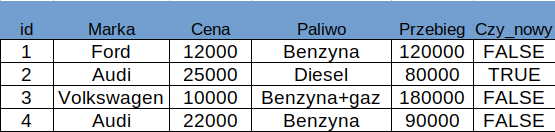

## Podstawy SQL
### Structured Query Language - ustrukturyzowany język zapytań

Podczas warsztatu omówimy jedynie podstawy języka SQL. Będą to zapytania typu:

- CREATE - do tworzenia tabeli
- INSERT - do tworzenia nowych wierszy
- SELECT - do wyciągania z tabeli danych
- UPDATE - do edycji istniejących danych
- DELETE - do usuwania danych
- DROP - do usuwania tabel

Kod SQLa to tak zwane zapytania (*queries*). Różne typy zapytań pozwalają wykonać różne operacje (jak powyżej).

### CREATE

To zapytanie służy do tworzenia tabel. Korzystamy z niego stosunkowo rzadko. Poniższy kod posłuży do stworzenia tabeli przechowującej informacje o samochodach.

Uwaga: nazwy tabel oraz kolumn nie powinny zawierać:

- spacji
- wielkich liter (inaczej będziemy musieli pisać je w cudzysłowiach)

Możemy - podobnie jak dla zmiennych - używać dla tabel i kolumn nazw angielskich.

#### Przykład zapytania typu CREATE

``` SQL
CREATE TABLE cars (
    id          SMALLINT,              -- small integer (-32 768, +32 767)
    brand       VARCHAR(20),           -- varying length character with maximum characters number of 20
    price       NUMERIC,               -- any numerical value
    fuel_type   TEXT,                  -- text with any number of characters
    mileage     NUMERIC,
    is_new      BOOLEAN,               -- True or False
    prod_date   DATE                   -- yyyy-mm-dd               
);
```

Więcej na temat typów danych: https://www.postgresqltutorial.com/postgresql-data-types/

Oprócz typu danych dla każdej kolumny możemy określić dodatkowe parametry, tzw. constraints. Przykłady takich parametrów to:
- NOT NULL (wartość w danej kolumnie nie może być brakująca)
- UNIQUE  (wartość w danej kolumnie musi być unikalna)

Jest również specjalny typ danych, który często stosujemy dla kolumny id. Ten typ nazywa się SERIAL i jest autonumerowany, to znaczy że ładując dane do tabeli nie będziemy musieli podawać wartości dla takiej kolumny. Pojawi się ona automatycznie jako kolejna liczba całkowita: 1, 2, 3, ...

Wykorzystując powyższe informacje przebudujmy nasze zapytanie CREATE:

``` SQL
CREATE TABLE cars (
    id          SERIAL,             
    brand       VARCHAR(20) NOT NULL,          
    price       NUMERIC UNIQUE,              
    fuel_type   TEXT NOT NULL,                 
    mileage     NUMERIC,
    is_new      BOOLEAN,              
    prod_date   DATE                  
);
```

### INSERT

Tym zapytaniem dodajemy dane do tabeli

#### Przykłady zapytania typu INSERT

``` SQL
INSERT INTO cars (
id, brand, price, fuel_type, mileage, is_new, prod_date
)
VALUES (
1, 'Audi', 80000, 'Benzyna', 200000, True, '2015-09-12'
);

```

``` SQL
INSERT INTO cars (
brand, price
)
VALUES (
'Volvo', 90000
);

```

#### Przykład generatora losowych zapytań typu INSERT

In [ ]:
import numpy as np

In [ ]:
brands = ["'Audi'", "'Ford'", "'Renault'", "'Fiat'"]
fuel_types = ["'Benzyna'", "'Diesel'", "'Benzyna+LPG'"]
true_false = ["'True'", "'False'"]

for i in range(200):
    brand = np.random.choice(brands, p=[1/len(brands)]*len(brands), size=(1,))[0]
    price = str(np.random.randint(10000, 100000))
    fuel = np.random.choice(fuel_types, p=[1/len(fuel_types)]*len(fuel_types), size=(1,))[0]
    mileage = str(np.random.randint(150000, 250000))
    is_new = np.random.choice(true_false, p=[1/len(true_false)]*len(true_false), size=(1,))[0]
    prod_date = f"'{np.random.randint(2000, 2020)}-{np.random.randint(1, 12)}-{np.random.randint(1, 25)}'"
    
    values = [brand, price, fuel, mileage, is_new, prod_date]
    query = f"INSERT INTO cars (brand, price, fuel_type, mileage, is_new, prod_date) VALUES ({','.join(values)});"
    
    print(query, '\n')

Jeśli wartość ma być pusta, należy wpisać NULL

### SELECT

Prawdopodobnie najczęściej wykorzystywane zapytanie. Służy do wyciągania z tabeli danych

#### Przykłady zapytań typu SELECT

``` SQL
SELECT * FROM cars; 
```

``` SQL
SELECT brand, price, mileage FROM cars; 
```

``` SQL
SELECT * FROM cars
WHERE price > 50000; 
```

``` SQL
SELECT * FROM cars
WHERE price > 50000 and is_new='False';   -- pojedynczy znak równości !
```

``` SQL
SELECT * FROM cars
WHERE fuel = 'Benzyna' or brand LIKE 'Fo%'; 
```

``` SQL
SELECT * FROM cars
WHERE price > 50000
ORDER BY mileage;  -- domyślnie sortuje rosnąco. Aby sortować malejąco dodaj DESC
```

#### Zapytanie typu SELECT - podsumowanie

- gwiazdka - wszystkie kolumny. Alternatywnie można wypisać wybrane kolumny
- WHERE służy do stawiania warunków logicznych dla wyszukiwanych wierszy
- możliwe operatory dla WHERE: =, >, <, LIKE
- warunki logiczne łączymy poprzez *and* i *or*
- wyniki możemy szeregować poprzez ORDER BY

#### Zapytanie typu SELECT - zadania

1. Wyciągnij wszystkie wiersze gdzie przebieg jest w zakresie 180tys - 200tys km
2. Wyciągnij id i datę produkcji wszystkich samochodów marki Audi
3. Wyciągnij wszystkie kolumny dla wierszy gdzie cena jest większa niż 40 000 lub samochód jest nowy. Uszereguj wyniki malejąco według przebiegu

### UPDATE

Raczej rzadko stosowane zapytanie w podstawowych zastosowaniach, ale przydatne kiedy chcemy edytować dane.

#### Przykłady zapytania typu UPDATE

``` SQL
UPDATE cars SET brand = 'Opel' WHERE mileage > 150000;
```

``` SQL
UPDATE cars SET (mileage, is_new) = (1000, 'False') WHERE id = 4;
```

### DELETE

Służy do usuwania wierszy z tabeli

#### Przykład zapytania typu DELETE

``` SQL
DELETE FROM cars WHERE is_new = False
```

### DROP

Służy do usuwania calej tabeli albo bazy danych.

#### Przykład zapytania typu DROP

``` SQL
DROP TABLE cars
```

# 3. Zadanie

- Zaprojektuj i utwórz za pomocą zapytania CREATE tabelę, która będzie przechowywać dowolne obiekty, np. studentów uczelni, transakcje w sklepie, informacje o pogodzie w kolejnych dniach, ... . Wystarczy żeby tabela miała 3-4 kolumny, im prościej tym lepiej. Wywołaj zapytanie w pgAdminie

- Dobierz odpowiednie typy danych. Ich dokładny opis możesz znaleźć np. tutaj -> https://www.postgresqltutorial.com/postgresql-data-types/

- Wykorzystaj typ SERIAL oraz constrainty NOT NULL i UNIQUE jeśli będą potrzebne

- Następnie napisz kod w Pythonie, który wygeneruje zapytania typu INSERT i wyprintuje je lub zapisze w pliku. Skopiuj treść tych zapytań do pgAdmina i uruchom. 

- Wykonaj kilka zapytań typu SELECT, UPDATE i DELETE tak aby zaznajomić się z nimi w praktyce. 

- Na koniec całkowicie usuń tabelę.

- Zachowaj treści zapytań, będą potrzebne w kolejnym zadaniu


Czas: około 50 minut